In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import nltk
import string
import re
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("twittersentiment.csv")

In [3]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
def remove_pattern(txt,pattern):
    r=re.findall(pattern,txt)
    for word in r:
        txt=re.sub(word,"",txt)
    return txt

In [6]:
df["clean_tweet"]=np.vectorize(remove_pattern)(df["tweet"],"@[\w]*")

In [7]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [8]:
df["clean_tweet"]=df["clean_tweet"].str.replace("[^a-zA-Z#]"," ")

In [9]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [10]:
#removing short words <4
df["clean_tweet"]=df["clean_tweet"].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))

In [11]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [12]:
tokenizedtweet=df["clean_tweet"].apply(lambda x : x.split())
tokenizedtweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [13]:
from nltk.stem.porter import PorterStemmer
stemmer= PorterStemmer()
tokenizedtweet=tokenizedtweet.apply(lambda x : [stemmer.stem(word) for word in x])
tokenizedtweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [14]:
tokenizedtweet=tokenizedtweet.apply(lambda x : " ".join([i for i in x]))
tokenizedtweet.head()

0    when father dysfunct selfish drag kid into dys...
1    thank #lyft credit caus they offer wheelchair ...
2                                  bihday your majesti
3                           #model love take with time
4                             factsguid societi #motiv
Name: clean_tweet, dtype: object

In [15]:
df["clean_tweet"]=tokenizedtweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


In [16]:
all_words=" ".join([i for i in df["clean_tweet"]])

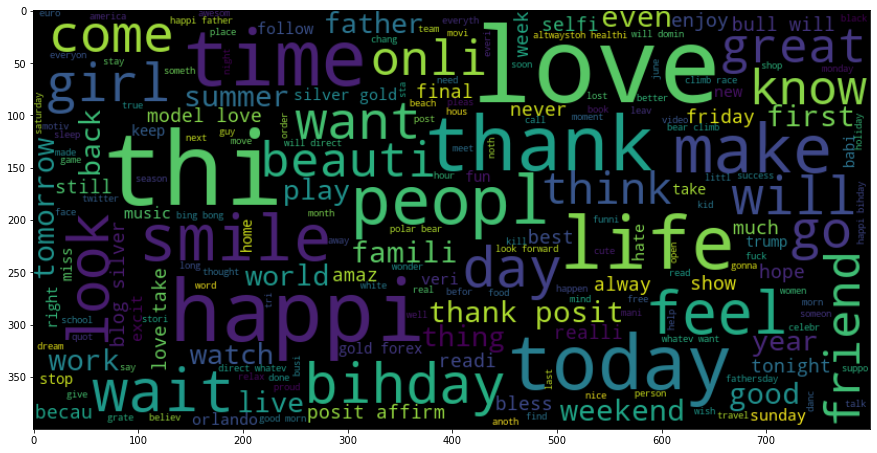

In [17]:
from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=400,margin=2,random_state=42,max_font_size=100).generate(all_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation="bilinear")
plt.show()

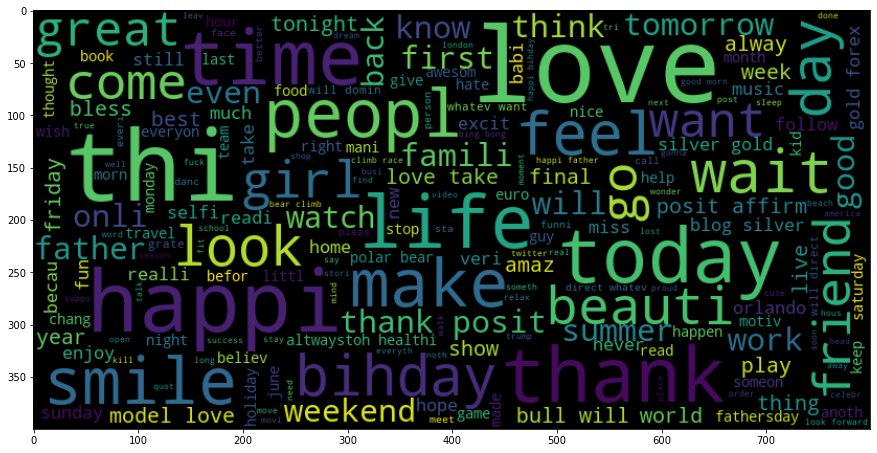

In [18]:
all_words=" ".join([i for i in df["clean_tweet"][df["label"]==0]])
wordcloud=WordCloud(width=800,height=400,margin=2,random_state=42,max_font_size=100).generate(all_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation="bilinear")
plt.show()

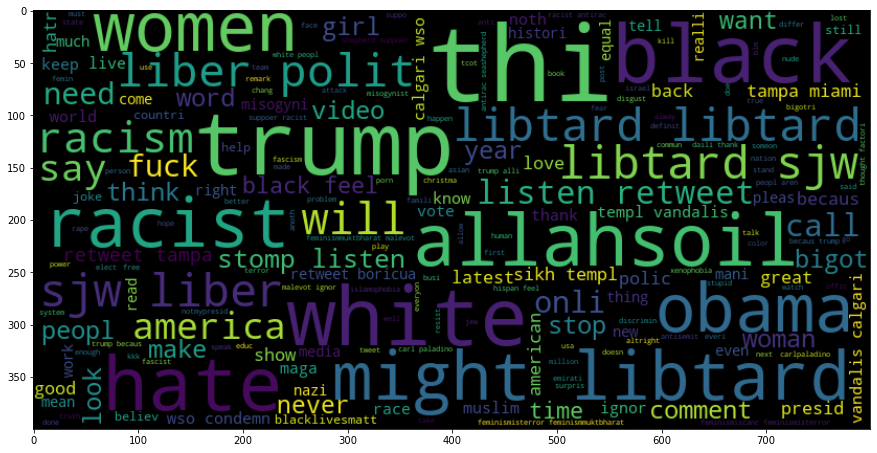

In [19]:
all_words=" ".join([i for i in df["clean_tweet"][df["label"]==1]])
wordcloud=WordCloud(width=800,height=400,margin=2,random_state=42,max_font_size=100).generate(all_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation="bilinear")
plt.show()

In [20]:
#hashtag extraction
def hashtag_extract(tweets):
    hashtags=[]
    for tweet in tweets:
        ht=re.findall(r"#(\w+)",tweet)
        hashtags.append(ht)
    return hashtags

In [21]:
ht_positive=hashtag_extract(df["clean_tweet"][df["label"]==0])
ht_negative=hashtag_extract(df["clean_tweet"][df["label"]==1])

In [22]:
ht_positive[0:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [23]:
ht_positive=sum(ht_positive,[])
ht_negative=sum(ht_negative,[])

In [24]:
ht_positive[0:10]

['run',
 'lyft',
 'disapoint',
 'getthank',
 'model',
 'motiv',
 'allshowandnogo',
 'school',
 'exam',
 'hate']

In [25]:
f=nltk.FreqDist(ht_positive)

In [26]:
d=pd.DataFrame({"Hahtag":list(f.keys()),"Frequency":list(f.values())})

In [27]:
d.head()

,Hahtag,Frequency
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


In [28]:
d=d.nlargest(columns="Frequency",n=10)
d

,Hahtag,Frequency
32,love,1654
39,posit,917
58,smile,676
157,healthi,573
38,thank,534
176,fun,463
343,life,425
92,affirm,423
286,summer,390
4,model,375


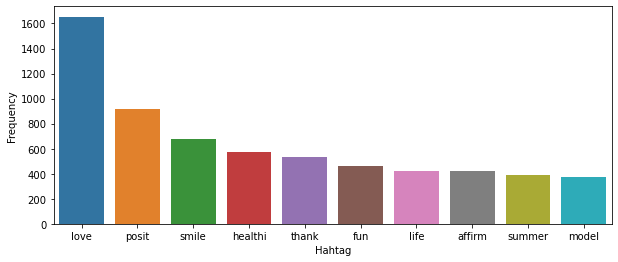

In [29]:
plt.figure(figsize=(10,4))
sns.barplot(data=d,x="Hahtag",y="Frequency")
plt.show()

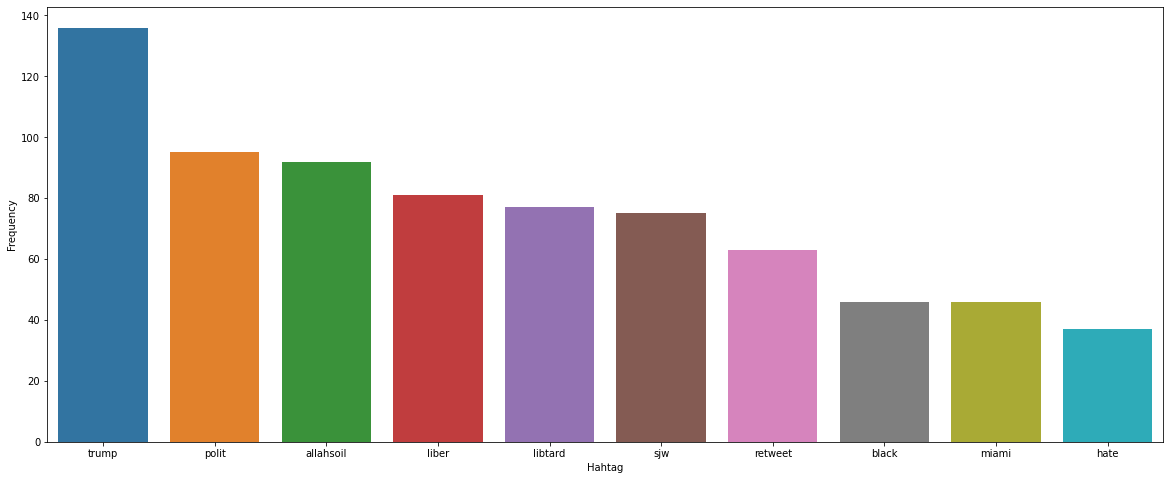

In [30]:
f=nltk.FreqDist(ht_negative)
d=pd.DataFrame({"Hahtag":list(f.keys()),"Frequency":list(f.values())})
d=d.nlargest(columns="Frequency",n=10)
plt.figure(figsize=(20,8))
sns.barplot(data=d,x="Hahtag",y="Frequency")
plt.show()

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words="english")
bow=bow_vectorizer.fit_transform(df["clean_tweet"])

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(bow,df["label"],random_state=42,test_size=0.25)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score
le=LogisticRegression()

In [34]:
le.fit(x_train,y_train)

LogisticRegression()

In [35]:
pred=le.predict(x_test)

In [36]:
accuracy_score(y_test,pred)

0.9469403078463271

In [37]:
CountVectorizer?

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words="english",use_idf=True,ngram_range=(1,2))
tf=tf.fit_transform(df["clean_tweet"])

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(tf,df["label"],random_state=42,test_size=0.25)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score
le=LogisticRegression()

In [42]:
le.fit(x_train,y_train)

LogisticRegression()

In [43]:
pred=le.predict(x_test)

In [44]:
accuracy_score(y_test,pred)

0.9463146039294206

In [45]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [46]:
pred=classifier.predict(x_test)

In [47]:
accuracy_score(y_test,pred)

0.9385558753597798

In [51]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier(n_estimators=100)
r.fit(x_train,y_train)
pred=r.predict(x_test)
accuracy_score(y_test,pred)

0.9516956576148167

In [52]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier(n_estimators=10)
r.fit(x_train,y_train)
pred=r.predict(x_test)
accuracy_score(y_test,pred)

0.9493179827305719

In [53]:
from sklearn.svm import SVC
s= SVC(kernel='linear', random_state=0)  
s.fit(x_train,y_train)
pred=s.predict(x_test)
accuracy_score(y_test,pred)

0.9468151670629458

In [58]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train.todense(),y_train)
pred=gnb.predict(x_test.todense())
accuracy_score(y_test,pred)

0.529470654486297

In [59]:
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(x_train.todense(),y_train)
pred=model.predict(x_test.todense())
accuracy_score(y_test,pred)

0.9480665748967588

In [60]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(x_train.todense(),y_train)
pred=clf.predict(x_test.todense())
accuracy_score(y_test,pred)

0.9486922788136654